In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.functions import Functions
from wrappers.visualizer import Visualizer

level = 'andamento-nazionale'

path_data = './data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati',
       'variazione_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'nuovi_dimessi_guariti', 'nuovi_deceduti', 'nuovi_tamponi',
       'nuovi_casi_testati', 'ti_su_to', 'to_su_tp', 'np_su_nt', 'np_su_nct',
       'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [50]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 4) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 35098
Nuovi tamponi: 217758.0
Percentuale nuovi positivi/nuovi tamponi: 16.12 %
Nuovi guariti: 17734.0
Nuovi deceduti: 580.0
Variazione positivi ricoverati con sintomi: 997.0
Variazione positivi in terapia intensiva: 122.0
Variazione positivi in isolamento dimiciliare: 15657.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 10, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-11T17:00:00,1849,175,2024,34743,36767,1059,1616,212432,35597,...,547.0,10.0,98880.0,61422.0,8.65,5.50,1.63,2.63,6.71,4.526
1,2020-09-12T17:00:00,1951,182,2133,35370,37503,736,1501,213191,35603,...,759.0,6.0,92706.0,56552.0,8.53,5.69,1.62,2.65,4.00,4.082
2,2020-09-13T17:00:00,2042,187,2229,36280,38509,1006,1458,213634,35610,...,443.0,7.0,72143.0,48860.0,8.39,5.79,2.02,2.98,2.75,3.888
3,2020-09-14T17:00:00,2122,197,2319,36868,39187,678,1008,213950,35624,...,316.0,14.0,45309.0,31849.0,8.50,5.92,2.22,3.16,5.35,2.618
4,2020-09-15T17:00:00,2222,201,2423,37289,39712,525,1229,214645,35633,...,695.0,9.0,80517.0,50504.0,8.30,6.10,1.53,2.43,2.03,3.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-06T17:00:00,24005,2515,26520,472598,499118,26770,37809,322925,40638,...,10586.0,446.0,234245.0,134566.0,9.48,5.31,16.14,28.10,5.19,8.005
57,2020-11-07T17:00:00,25109,2634,27743,504793,532536,33418,39811,328891,41063,...,5966.0,425.0,231673.0,137646.0,9.49,5.21,17.18,28.92,4.73,7.976
58,2020-11-08T17:00:00,26440,2749,29189,529447,558636,26100,32616,335074,41394,...,6183.0,331.0,191144.0,119249.0,9.42,5.23,17.06,27.35,4.37,6.125
59,2020-11-09T17:00:00,27636,2849,30485,542849,573334,14698,25271,345289,41750,...,10215.0,356.0,147725.0,88701.0,9.35,5.32,17.11,28.49,3.64,4.524


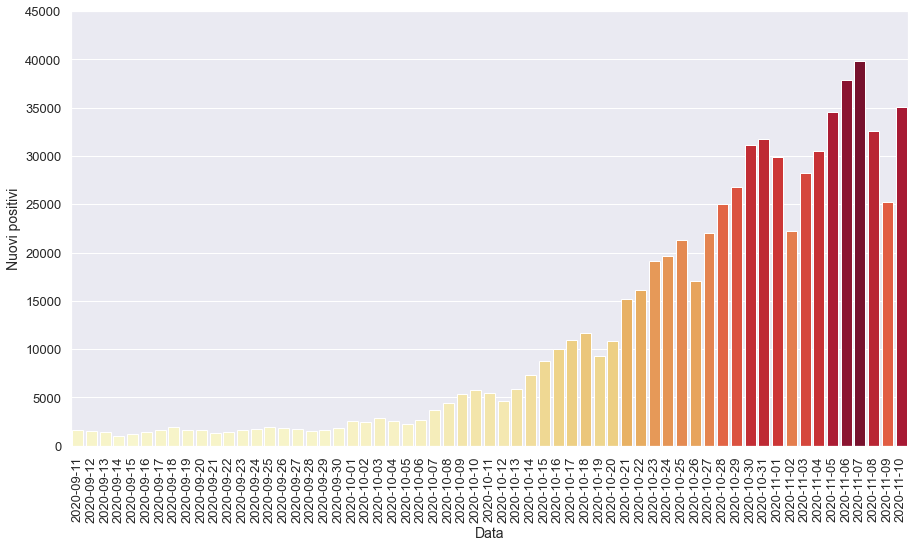

In [8]:
# New positives on new swabs in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_positivi',
    x_label='Data',
    y_label='Nuovi positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi'})

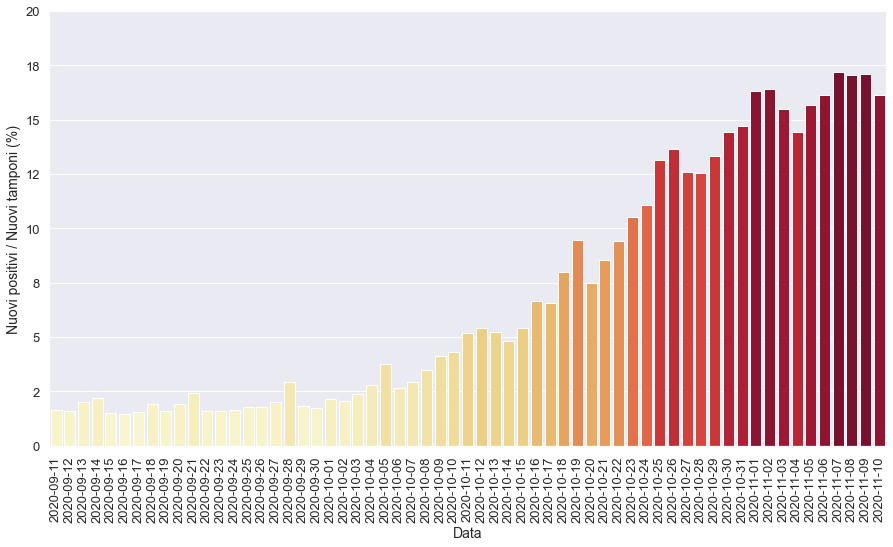

In [9]:
# New positives on new swabs in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi'})

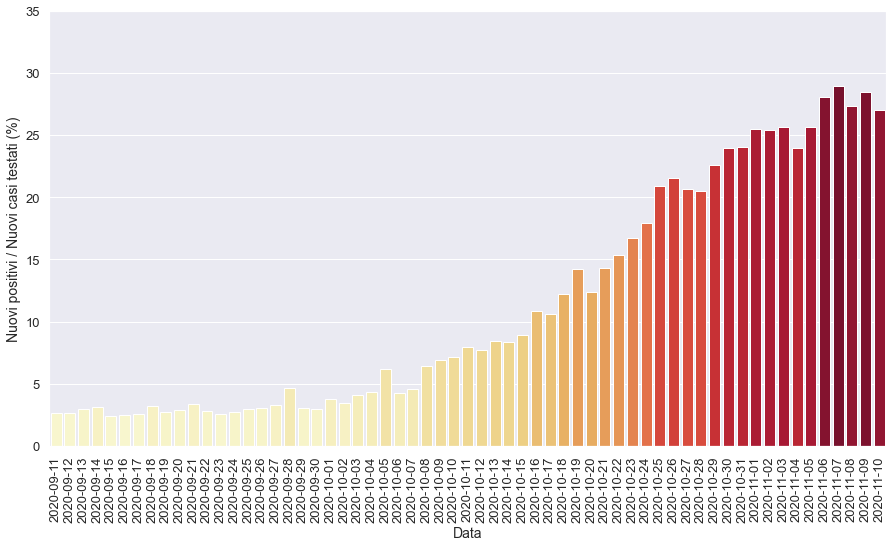

In [10]:
# New positives on new tested cases in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nct',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi casi testati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'})

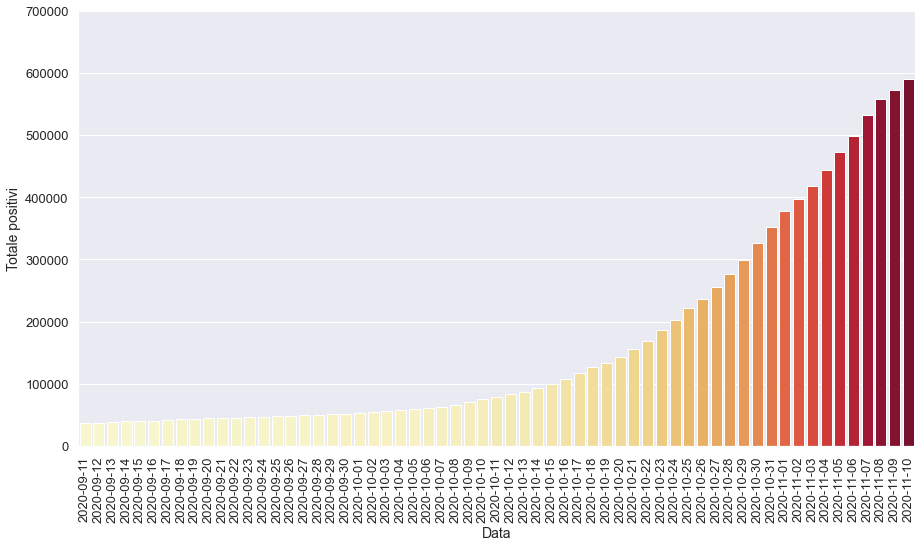

In [11]:
# Percentage of variation of positives in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_positivi',
    x_label='Data',
    y_label='Totale positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'totale_positivi'})

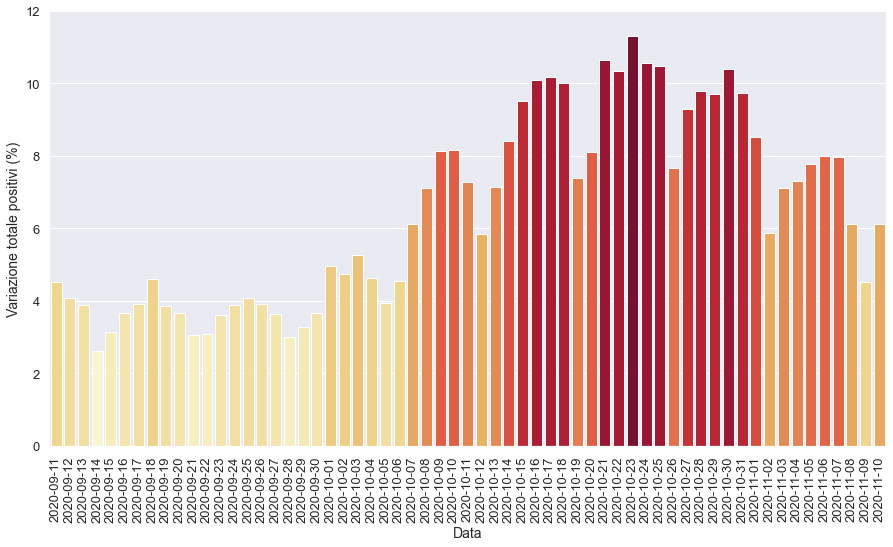

In [12]:
# Percentage of variation of positives in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_pos_perc',
    x_label='Data',
    y_label='Variazione totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_perc'})

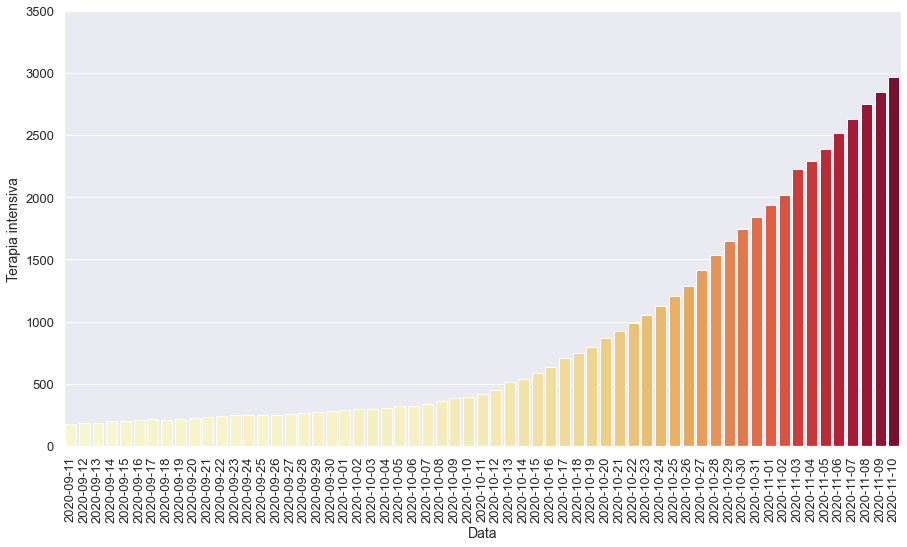

In [13]:
# Positives in ICU in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva'})

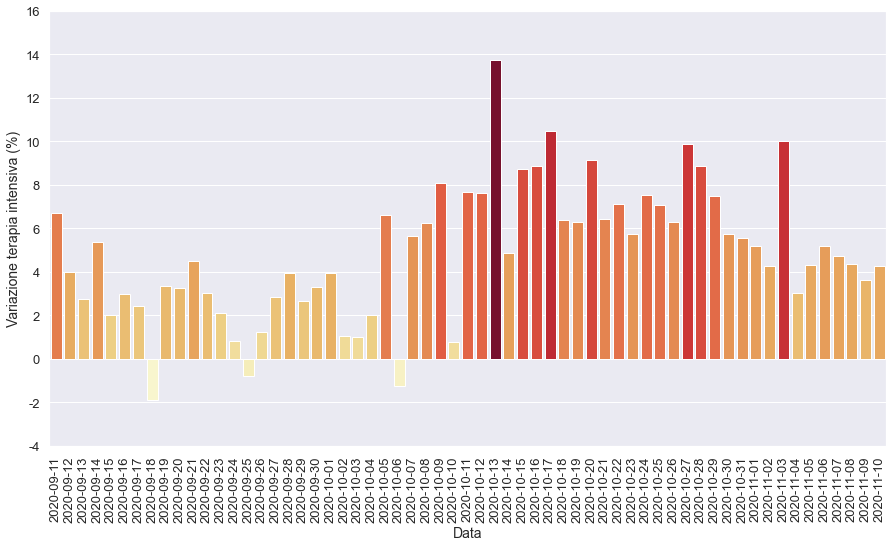

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_ti_perc',
    x_label='Data',
    y_label='Variazione terapia intensiva (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_perc'})

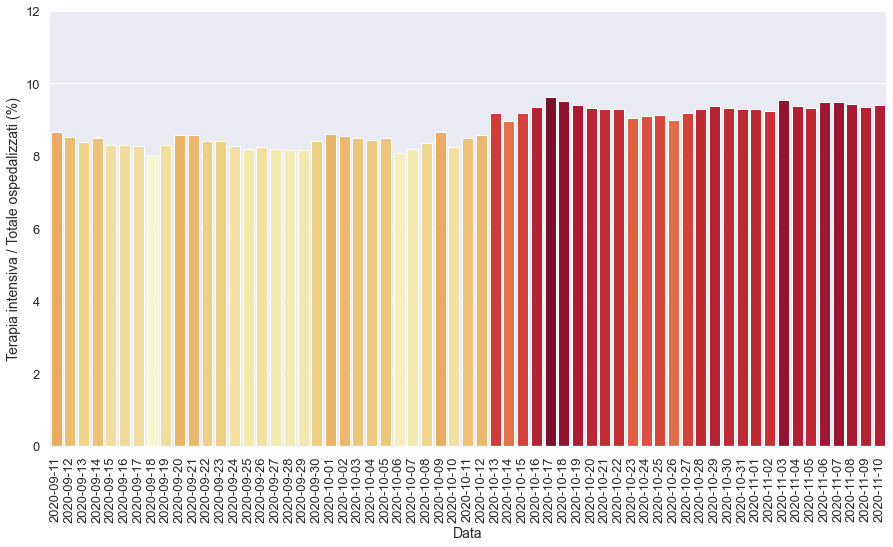

In [15]:
# Positives in ICU in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='ti_su_to',
    x_label='Data',
    y_label='Terapia intensiva / Totale ospedalizzati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'})

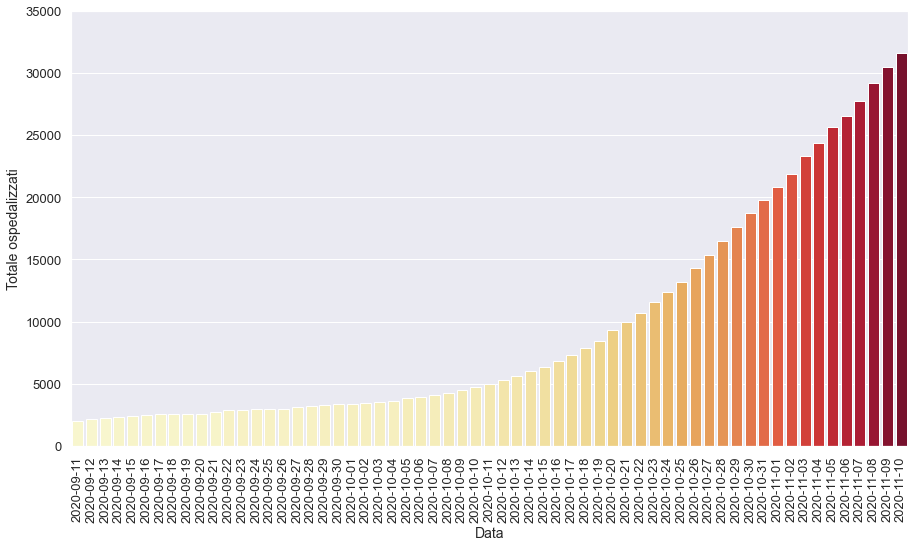

In [16]:
# Hospitalized positives in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_ospedalizzati',
    x_label='Data',
    y_label='Totale ospedalizzati',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati'})

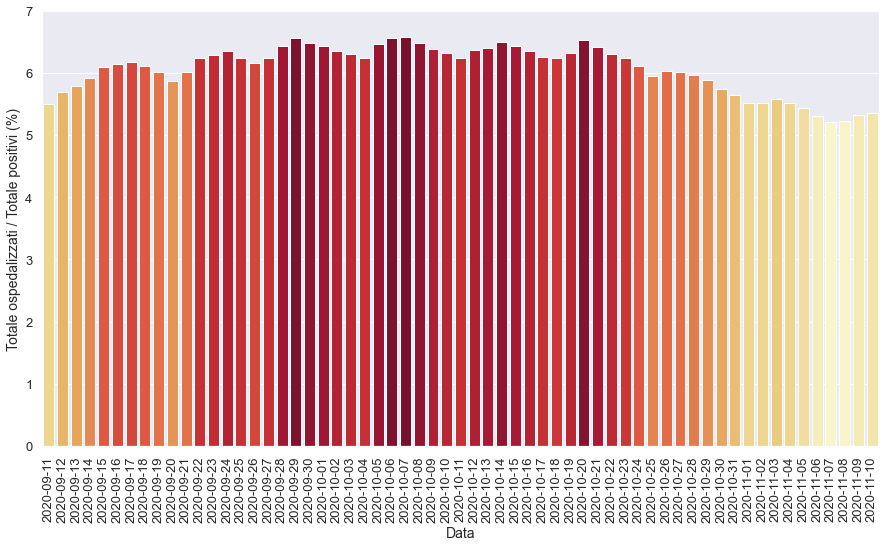

In [17]:
# Hospitalized positives in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='to_su_tp',
    x_label='Data',
    y_label='Totale ospedalizzati / Totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati_su_totale_positivi'})

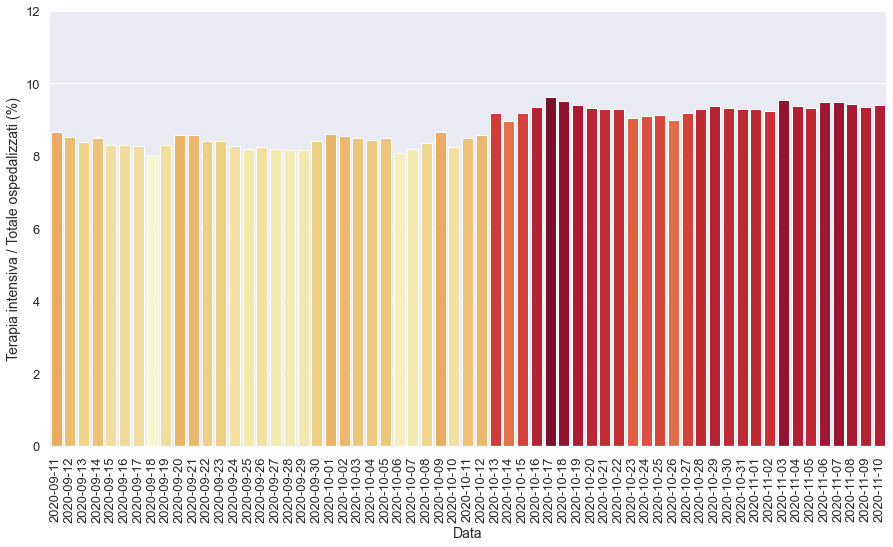

In [18]:
# Positives in ICU in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='ti_su_to',
    x_label='Data',
    y_label='Terapia intensiva / Totale ospedalizzati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'})

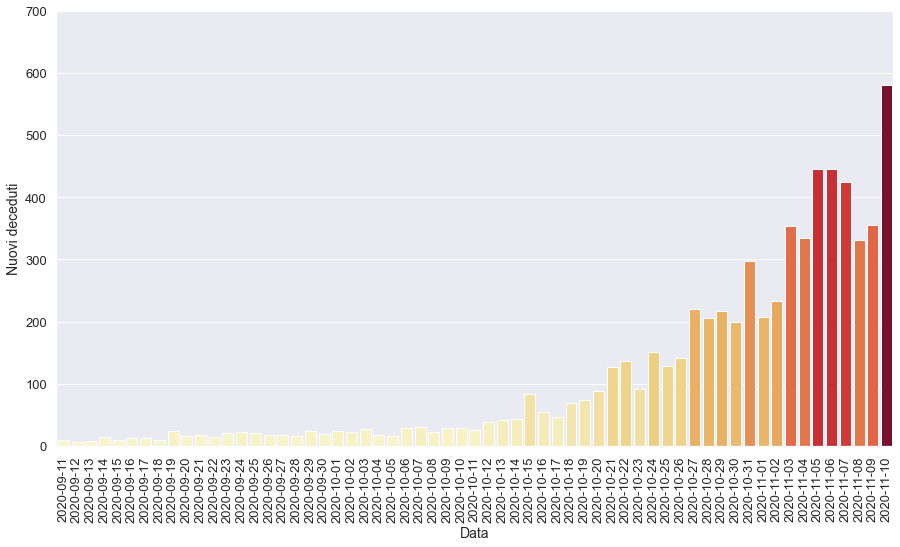

In [19]:
# New deads in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_deceduti',
    x_label='Data',
    y_label='Nuovi deceduti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'nuovi_deceduti'})

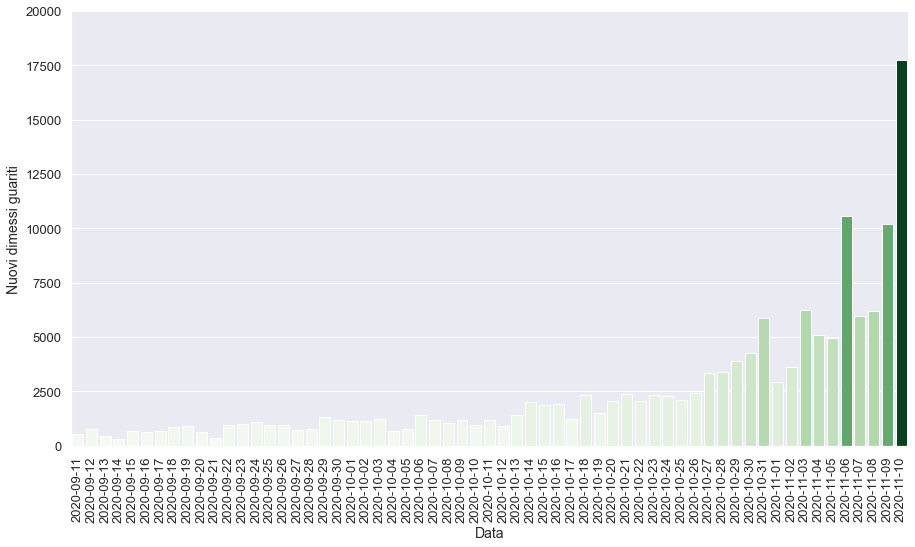

In [20]:
# New healed in the last 60 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_dimessi_guariti',
    x_label='Data',
    y_label='Nuovi dimessi guariti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    color='Greens',
    fig_size=(15, 8),
    save_info={'path': path_img, 'file_name': 'nuovi_dimessi_guariti'})

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-11T17:00:00,4519,420,4939,74136,79075,4246,5456,239709,36166,...,1184.0,26.0,104658.0,68708.0,8.50,6.25,5.21,7.94,7.69,7.291
1,2020-10-12T17:00:00,4821,452,5273,77491,82764,3689,4619,240600,36205,...,891.0,39.0,85442.0,59649.0,8.57,6.37,5.41,7.74,7.62,5.841
2,2020-10-13T17:00:00,5076,514,5590,81603,87193,4429,5901,242028,36246,...,1428.0,41.0,112544.0,70260.0,9.19,6.41,5.24,8.40,13.72,7.130
3,2020-10-14T17:00:00,5470,539,6009,86436,92445,5252,7332,244065,36289,...,2037.0,43.0,152196.0,87601.0,8.97,6.50,4.82,8.37,4.86,8.409
4,2020-10-15T17:00:00,5796,586,6382,92884,99266,6821,8804,245964,36372,...,1899.0,83.0,162932.0,98542.0,9.18,6.43,5.40,8.93,8.72,9.524
5,2020-10-16T17:00:00,6178,638,6816,100496,107312,8046,10010,247872,36427,...,1908.0,55.0,150377.0,92402.0,9.36,6.35,6.66,10.83,8.87,10.084
6,2020-10-17T17:00:00,6617,705,7322,109613,116935,9623,10925,249127,36474,...,1255.0,47.0,165837.0,103326.0,9.63,6.26,6.59,10.57,10.50,10.181
7,2020-10-18T17:00:00,7131,750,7881,118356,126237,9302,11705,251461,36543,...,2334.0,69.0,146541.0,95554.0,9.52,6.24,7.99,12.25,6.38,10.010
8,2020-10-19T17:00:00,7676,797,8473,125530,134003,7766,9338,252959,36616,...,1498.0,73.0,98862.0,65824.0,9.41,6.32,9.45,14.19,6.27,7.397
9,2020-10-20T17:00:00,8454,870,9324,133415,142739,8736,10874,255005,36705,...,2046.0,89.0,144737.0,87680.0,9.33,6.53,7.51,12.40,9.16,8.115


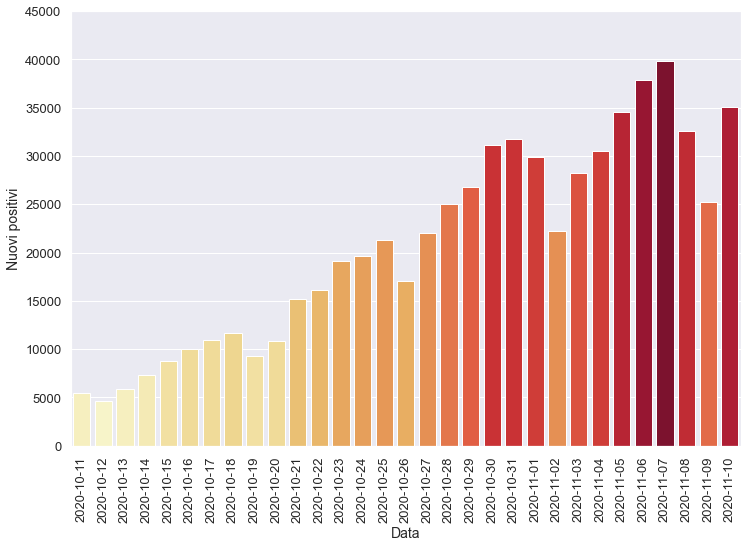

In [22]:
# New positives on new swabs in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_positivi',
    x_label='Data',
    y_label='Nuovi positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi'})

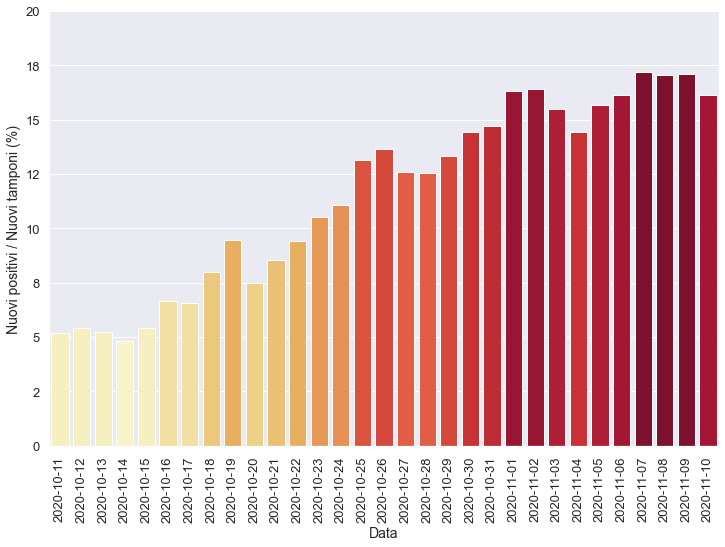

In [23]:
# New positives on new swabs in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi'})

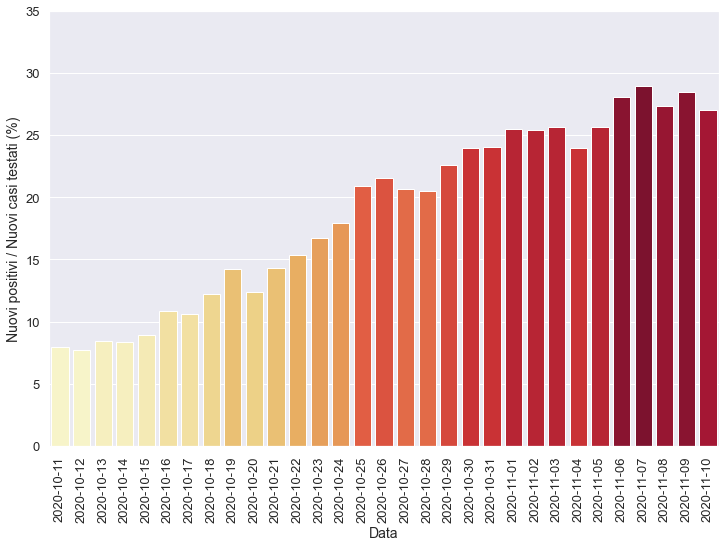

In [24]:
# New positives on new tested cases in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nct',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi casi testati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'})

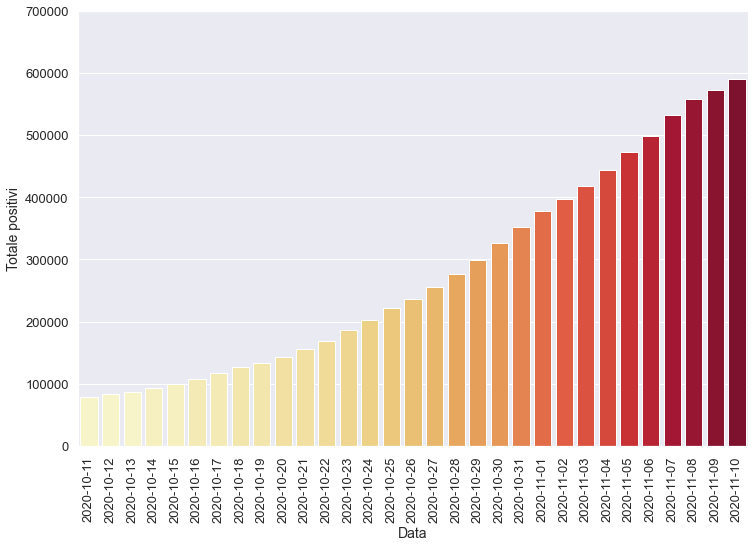

In [25]:
# Percentage of variation of positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_positivi',
    x_label='Data',
    y_label='Totale positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_positivi'})

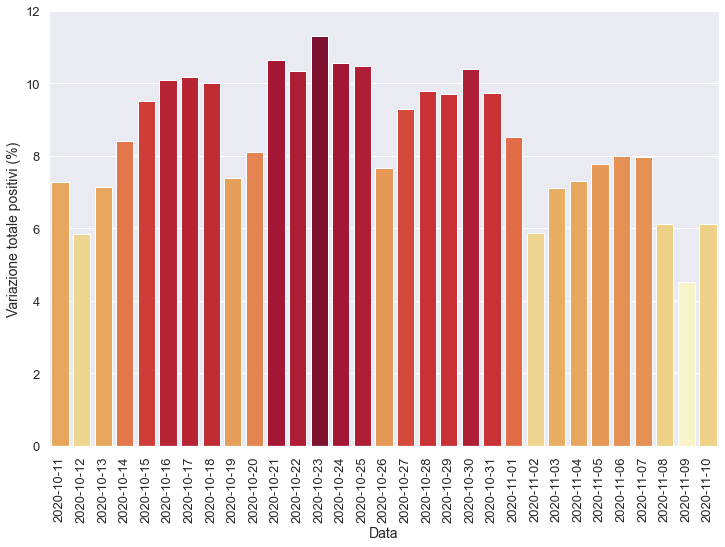

In [26]:
# Percentage of variation of positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_pos_perc',
    x_label='Data',
    y_label='Variazione totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_perc'})

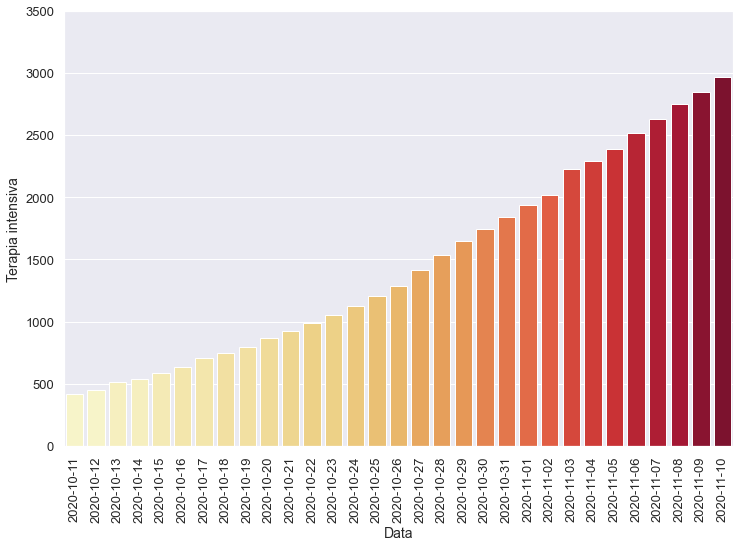

In [27]:
# Positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva'})

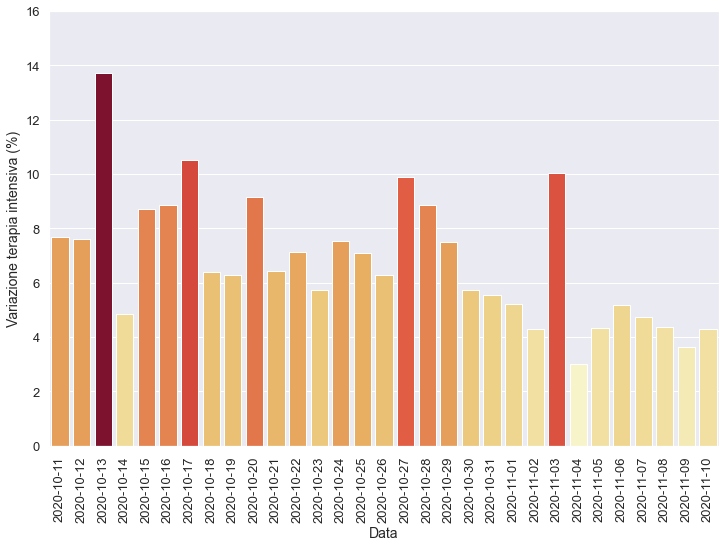

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_ti_perc',
    x_label='Data',
    y_label='Variazione terapia intensiva (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_perc'})

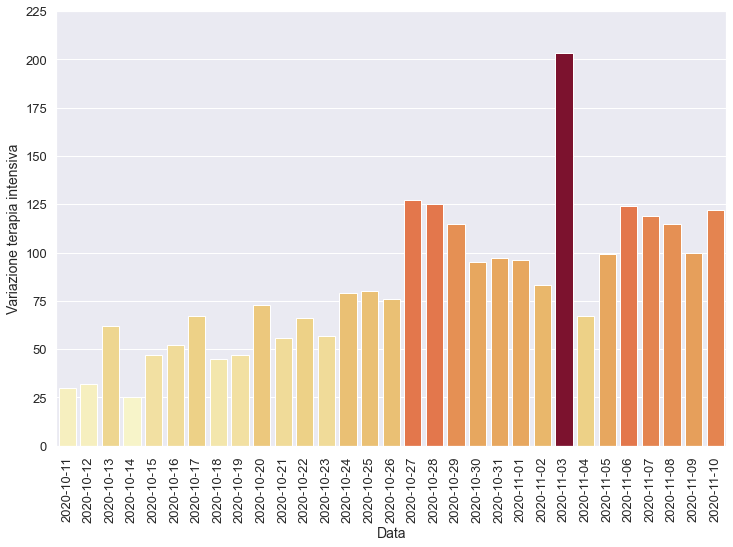

In [29]:
# Variation of positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='variazione_terapia_intensiva',
    x_label='Data',
    y_label='Variazione terapia intensiva',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_n_30'}

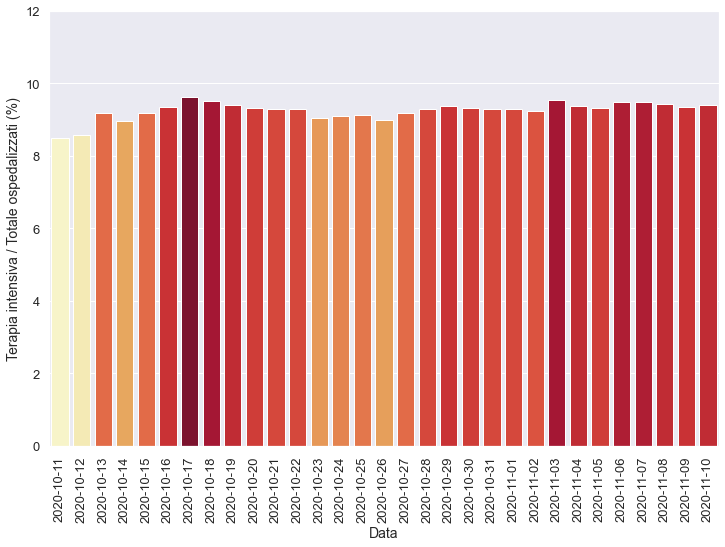

In [30]:
# Positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='ti_su_to',
    x_label='Data',
    y_label='Terapia intensiva / Totale ospedalizzati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'})

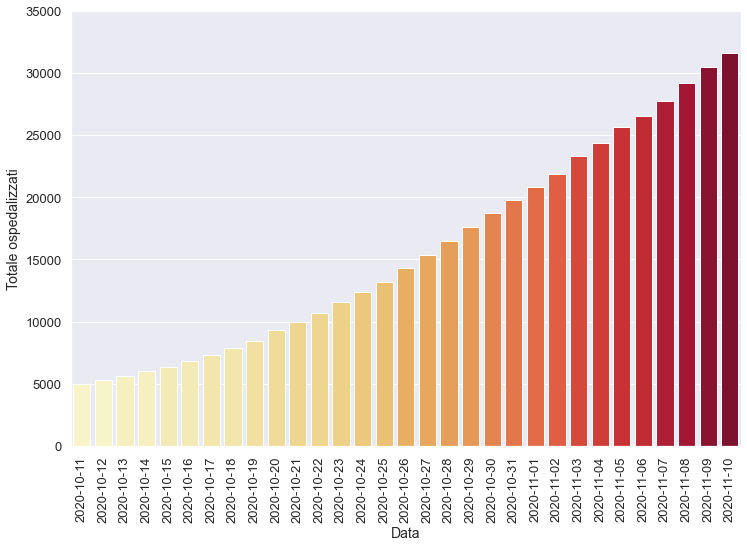

In [31]:
# Hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_ospedalizzati',
    x_label='Data',
    y_label='Totale ospedalizzati',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati'})

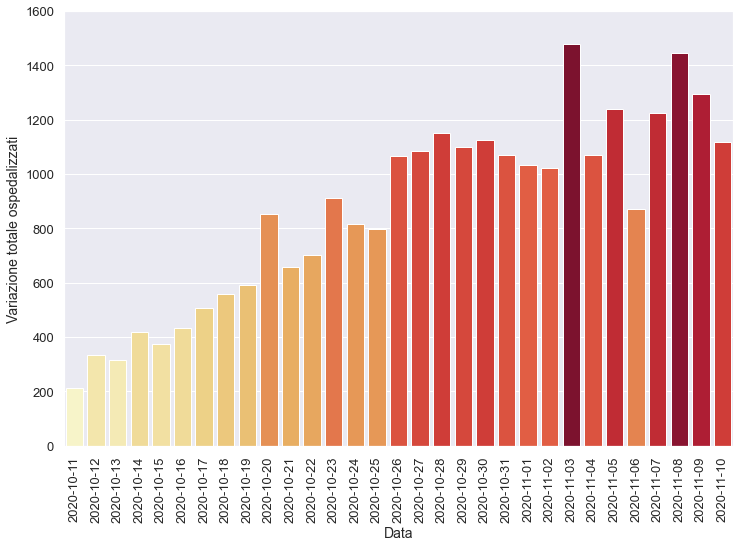

In [32]:
# Variation of hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='variazione_totale_ospedalizzati',
    x_label='Data',
    y_label='Variazione totale ospedalizzati',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_totale_ospedalizzati_n_30'}

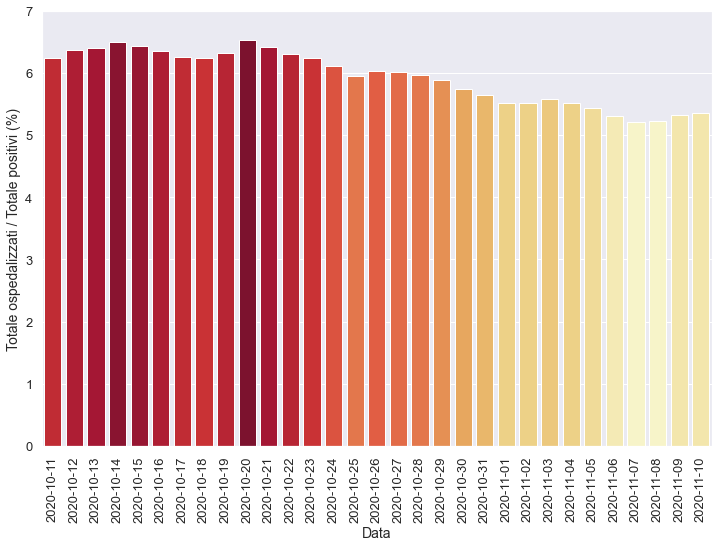

In [33]:
# Hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='to_su_tp',
    x_label='Data',
    y_label='Totale ospedalizzati / Totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati_su_totale_positivi'})

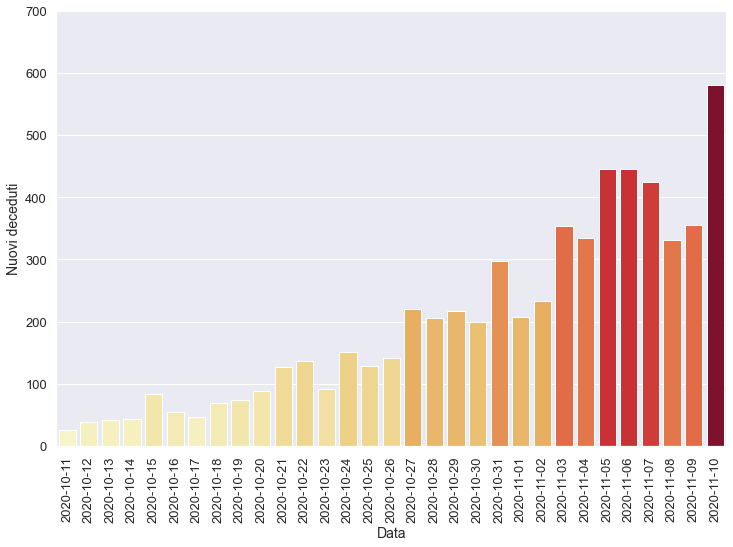

In [34]:
# New deads in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_deceduti',
    x_label='Data',
    y_label='Nuovi deceduti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_deceduti'})

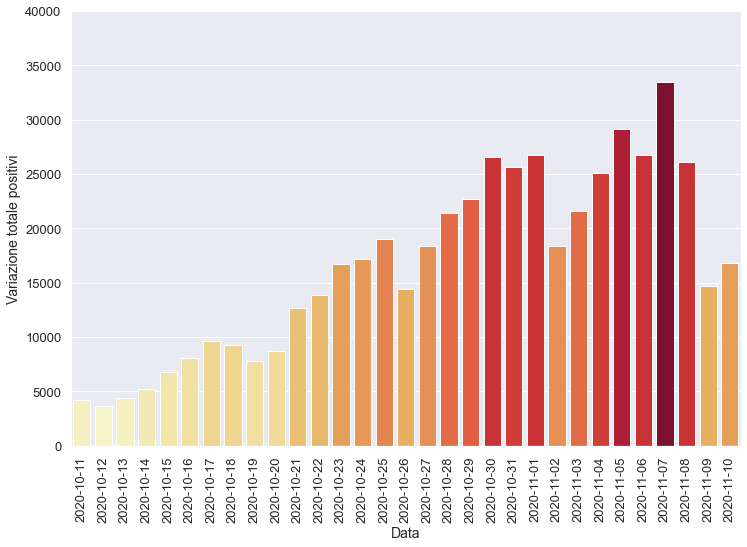

In [35]:
# Variation of total positives in in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='variazione_totale_positivi',
    x_label='Data',
    y_label='Variazione totale positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_n_30'}

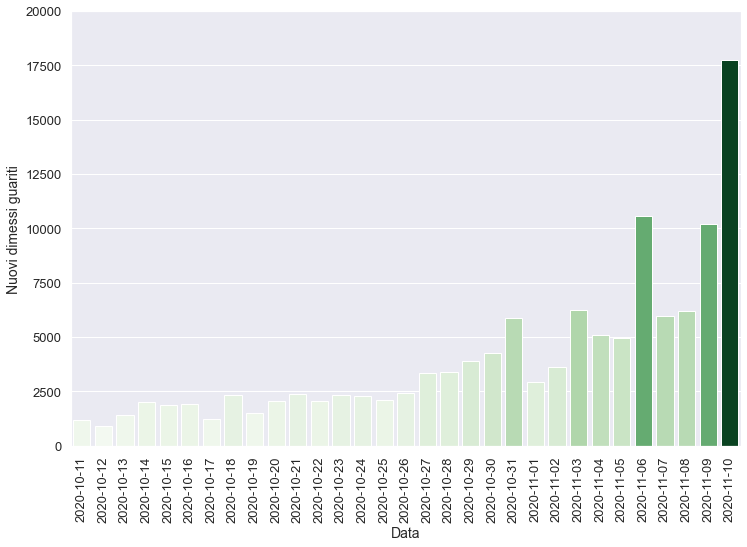

In [36]:
# New healed in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_dimessi_guariti',
    x_label='Data',
    y_label='Nuovi dimessi guariti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    color='Greens',
    save_info={'path': path_img, 'file_name': 'nuovi_dimessi_guariti'})

In [37]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,21114,2225,23339,394803,418142,21630,28244,302275,39412,...,6258.0,353.0,182287.0,109932.0,9.53,5.58,15.49,25.69,10.04,7.123
1,2020-11-04T17:00:00,22116,2292,24408,418827,443235,25093,30550,307378,39747,...,5103.0,335.0,211831.0,127500.0,9.39,5.51,14.42,23.96,3.01,7.306
2,2020-11-05T17:00:00,23256,2391,25647,446701,472348,29113,34505,312339,40192,...,4961.0,445.0,219884.0,134550.0,9.32,5.43,15.69,25.64,4.32,7.785
3,2020-11-06T17:00:00,24005,2515,26520,472598,499118,26770,37809,322925,40638,...,10586.0,446.0,234245.0,134566.0,9.48,5.31,16.14,28.10,5.19,8.005
4,2020-11-07T17:00:00,25109,2634,27743,504793,532536,33418,39811,328891,41063,...,5966.0,425.0,231673.0,137646.0,9.49,5.21,17.18,28.92,4.73,7.976
5,2020-11-08T17:00:00,26440,2749,29189,529447,558636,26100,32616,335074,41394,...,6183.0,331.0,191144.0,119249.0,9.42,5.23,17.06,27.35,4.37,6.125
6,2020-11-09T17:00:00,27636,2849,30485,542849,573334,14698,25271,345289,41750,...,10215.0,356.0,147725.0,88701.0,9.35,5.32,17.11,28.49,3.64,4.524
7,2020-11-10T17:00:00,28633,2971,31604,558506,590110,16776,35098,363023,42330,...,17734.0,580.0,217758.0,129814.0,9.40,5.36,16.12,27.04,4.28,6.122


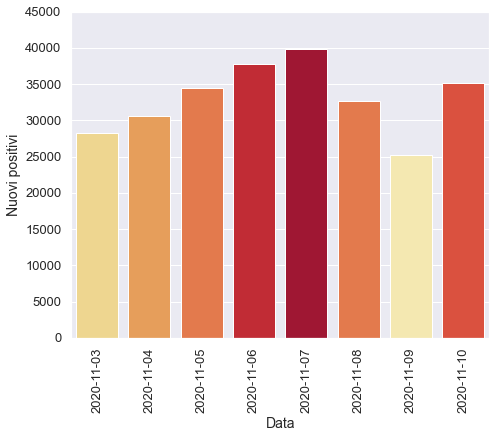

In [38]:
# New positives on new swabs in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_positivi',
    x_label='Data',
    y_label='Nuovi positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi'})

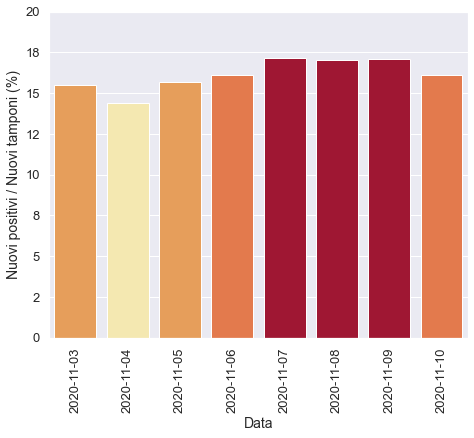

In [39]:
# New positives on new swabs in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi'})

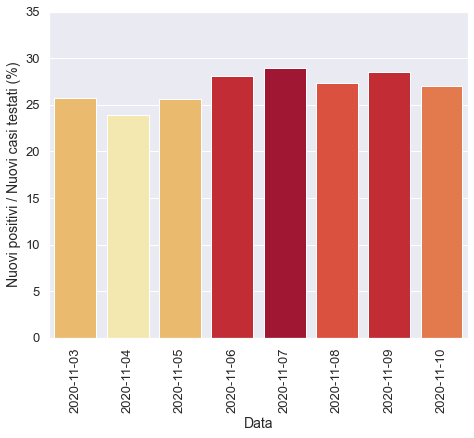

In [40]:
# New positives on new tested cases in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='np_su_nct',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi casi testati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'})

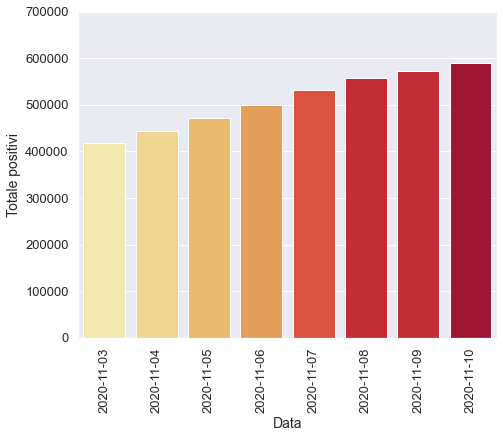

In [41]:
# Percentage of variation of positives in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_positivi',
    x_label='Data',
    y_label='Totale positivi',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'totale_positivi'})

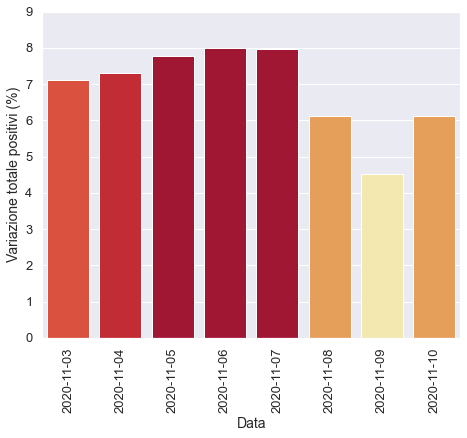

In [42]:
# Percentage of variation of positives in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_pos_perc',
    x_label='Data',
    y_label='Variazione totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_perc'})

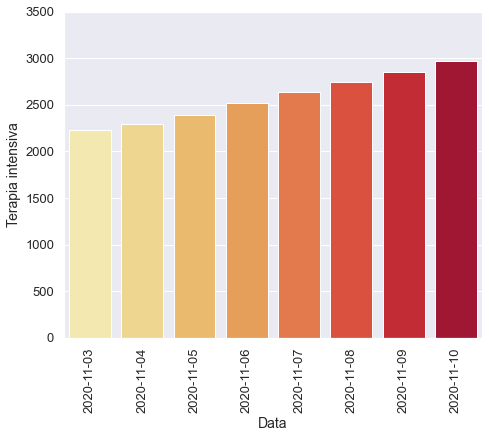

In [43]:
# Positives in ICU in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva'})

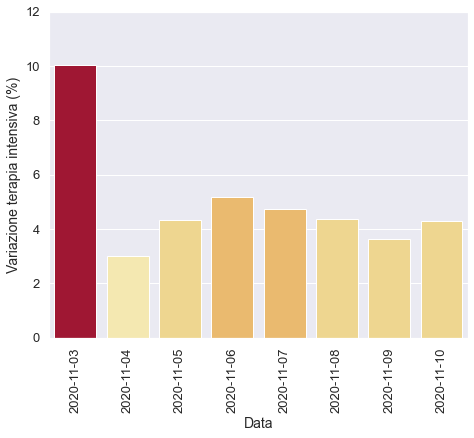

In [44]:
# Percentage of variation of positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='var_ti_perc',
    x_label='Data',
    y_label='Variazione terapia intensiva (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_perc'})

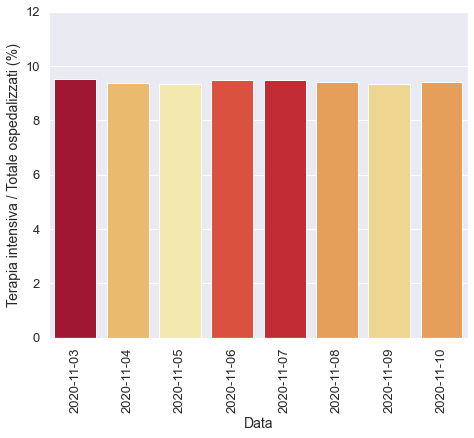

In [45]:
# Positives in ICU in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='ti_su_to',
    x_label='Data',
    y_label='Terapia intensiva / Totale ospedalizzati (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'})

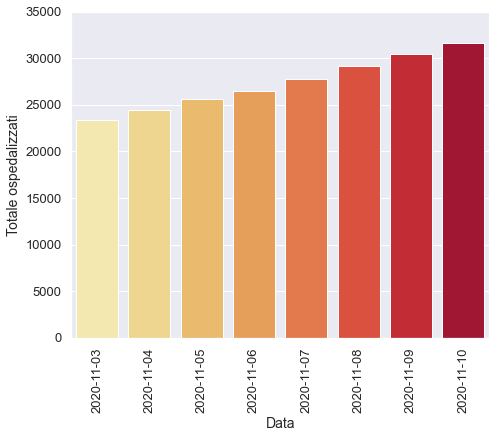

In [46]:
# Hospitalized positives in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='totale_ospedalizzati',
    x_label='Data',
    y_label='Totale ospedalizzati',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati'})

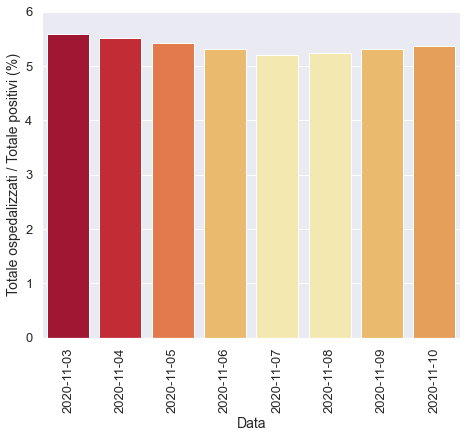

In [47]:
# Hospitalized positives in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='to_su_tp',
    x_label='Data',
    y_label='Totale ospedalizzati / Totale positivi (%)',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati_su_totale_positivi'})

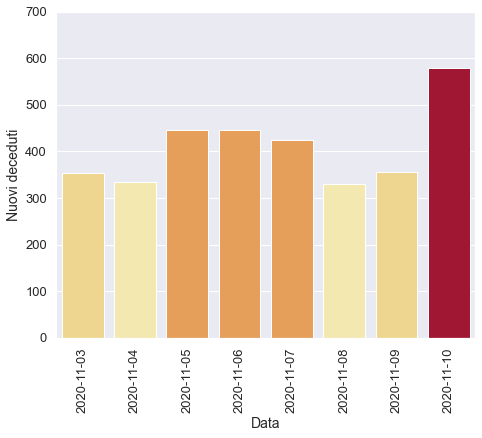

In [48]:
# New deads in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_deceduti',
    x_label='Data',
    y_label='Nuovi deceduti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'nuovi_deceduti'})

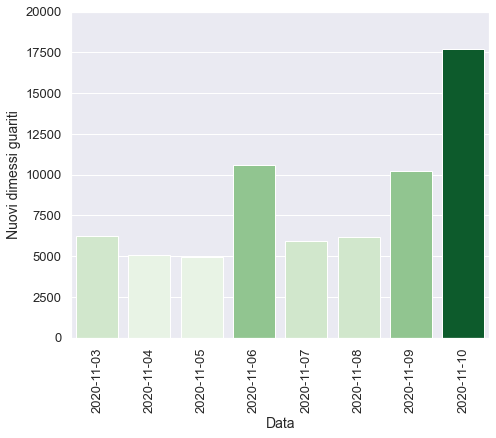

In [49]:
# New healed in the last 7 days
Visualizer.plot_hist_from_values(
    df_n,
    x_values='data',
    y_values='nuovi_dimessi_guariti',
    x_label='Data',
    y_label='Nuovi dimessi guariti',
    x_ticks=df_n.data.apply(lambda x: x.split('T')[0]),
    color='Greens',
    fig_size=(7.5, 6),
    save_info={'path': path_img, 'file_name': 'nuovi_dimessi_guariti'})